# Question 3 [Next word prediction using LSTM]

Source: [IG Tech Team](https://www.youtube.com/watch?v=VB7bbFIEAhk&ab_channel=IGTechTeam)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, UpSampling2D, Conv2D, Dense, Bidirectional, ZeroPadding2D,LeakyReLU, Reshape, Flatten, Dropout, Activation, BatchNormalization, LSTM, Embedding, GlobalAveragePooling2D, BatchNormalization, MaxPool2D, Conv2D, SpatialDropout2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import  Adam

from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import os

from tensorflow import keras
from keras.utils.vis_utils import plot_model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.models import Model, load_model
import pickle
import numpy as np

### Download the file

In [ ]:
!gdown https://drive.google.com/uc?id=16YVKFWB3yZxs5WoKRnmIz4CBbSxSi3ue

Downloading...
From: https://drive.google.com/uc?id=16YVKFWB3yZxs5WoKRnmIz4CBbSxSi3ue
To: /content/book_pride_and_prejudice.txt
100% 725k/725k [00:00<00:00, 136MB/s]


### Open and preprocess the data

In [ ]:
file = open("book_pride_and_prejudice.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook, Pride and Prejudice, by Jane Austen, Edited by R. W. (Robert William) Chapman This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Pride and Prejudice Author: Jane Austen Editor: R. W. (Robert William) Chapman Release Date: May 9, 2013 [eBook #42671] Language: English '

In [ ]:
len(data)

704792

### Apply tokenization and some other changes

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 178, 157, 1173, 290, 4, 877, 30, 73, 3195, 4176, 30, 3196, 2163, 3197]

In [ ]:
len(sequence_data)

126018

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

6736


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  126015


array([[   1,  178,  157, 1173],
       [ 178,  157, 1173,  290],
       [ 157, 1173,  290,    4],
       [1173,  290,    4,  877],
       [ 290,    4,  877,   30],
       [   4,  877,   30,   73],
       [ 877,   30,   73, 3195],
       [  30,   73, 3195, 4176],
       [  73, 3195, 4176,   30],
       [3195, 4176,   30, 3196]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  178  157]
 [ 178  157 1173]
 [ 157 1173  290]
 [1173  290    4]
 [ 290    4  877]
 [   4  877   30]
 [ 877   30   73]
 [  30   73 3195]
 [  73 3195 4176]
 [3195 4176   30]]
Response:  [1173  290    4  877   30   73 3195 4176   30 3196]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             67360     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 6736)              6742736   
                                                                 
Total params: 19,859,096
Trainable params: 19,859,096
Non-trainable params: 0
_________________________________________________________________


### Plot the model

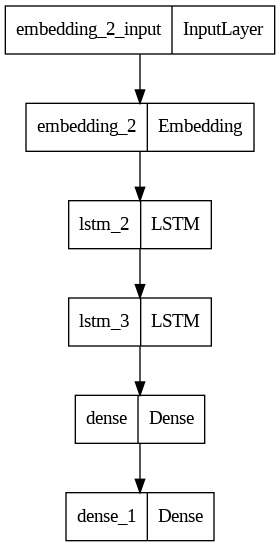

In [ ]:
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### Train the model

In [ ]:
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1969/1969 [==============================] - ETA: 0s - loss: 5.2479
Epoch 1: loss improved from inf to 5.24788, saving model to next_words.h5
1969/1969 [==============================] - 39s 18ms/step - loss: 5.2479
Epoch 2/70
1967/1969 [============================>.] - ETA: 0s - loss: 4.9843
Epoch 2: loss improved from 5.24788 to 4.98434, saving model to next_words.h5
1969/1969 [==============================] - 30s 15ms/step - loss: 4.9843
Epoch 3/70
1966/1969 [============================>.] - ETA: 0s - loss: 4.7794
Epoch 3: loss improved from 4.98434 to 4.77978, saving model to next_words.h5
1969/1969 [==============================] - 29s 15ms/step - loss: 4.7798
Epoch 4/70
1969/1969 [==============================] - ETA: 0s - loss: 4.6035
Epoch 4: loss improved from 4.77978 to 4.60348, saving model to next_words.h5
1969/1969 [==============================] - 30s 15ms/step - loss: 4.6035
Epoch 5/70
1968/1969 [============================>.] - ETA: 0s - loss: 4.4394
E

### Prediction

In [ ]:
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: The Project Gutenberg eBook
['Project', 'Gutenberg', 'eBook']
1/1 [==============================] - 1s 1s/step
pride
Enter your line: The Project Gutenberg eBook, Pride
['Gutenberg', 'eBook,', 'Pride']
1/1 [==============================] - 1s 616ms/step
1
Enter your line: He could not help seeing that you were about five times as
['five', 'times', 'as']
1/1 [==============================] - 0s 22ms/step
pretty
Enter your line: Mrs. Hurst and her sister
['and', 'her', 'sister']
1/1 [==============================] - 0s 21ms/step
allowed
Enter your line: Elizabeth preserved as steady a
['as', 'steady', 'a']
1/1 [==============================] - 0s 24ms/step
silence
Enter your line: 0
Execution completed.....
